# Titanic- Decision Tree
### Mateusz Szwerbel
#### 11.2020

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import pydot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings
import os
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import export_graphviz

%matplotlib inline
warnings.filterwarnings('ignore')

path = os.getcwd()

## Read data

In [2]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Explore data -  number of columns, rows, types, missing data ...

In [5]:
print('Shape test: ', test.shape)
print('Shape train: ', train.shape) #extra column - Survived

Shape test:  (418, 11)
Shape train:  (891, 12)


#### Missing data

In [6]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

**Missing data**:
- **Age** - test: 86 (21%); train: 177 (20%) 
- **Fare** - test: 1 (0.2%)
- **Cabin** - test: 327 (78%), train: 687 (77%)
- **Embarked** - train: 2 (0.2%)

#### Unique values and types

In [7]:
for i in train.columns:
    l = train[i].unique().tolist()
    print(i, len(l), l[:15], '\n')

PassengerId 891 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 

Survived 2 [0, 1] 

Pclass 3 [3, 1, 2] 

Name 891 ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan', 'Vestrom, Miss. Hulda Amanda Adolfina'] 

Sex 2 ['male', 'female'] 

Age 89 [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0] 

SibSp 7 [1, 0, 3, 4, 2, 5, 8] 

Parch 7 [0, 1, 2, 5, 3, 4, 6] 

Ticket 681 ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347742', '237736', 'PP 9549', '113783', 'A/5. 2151', '347

**Numeric**: 
- Continous: **Age**, **Fare**
- Discret: **PassengerId**, **Survived**, **Pclass**, **SibSp**, **Parch**

**Text**: **Name**, **Sex**, **Ticket**, **Cabin**, **Embarked** 

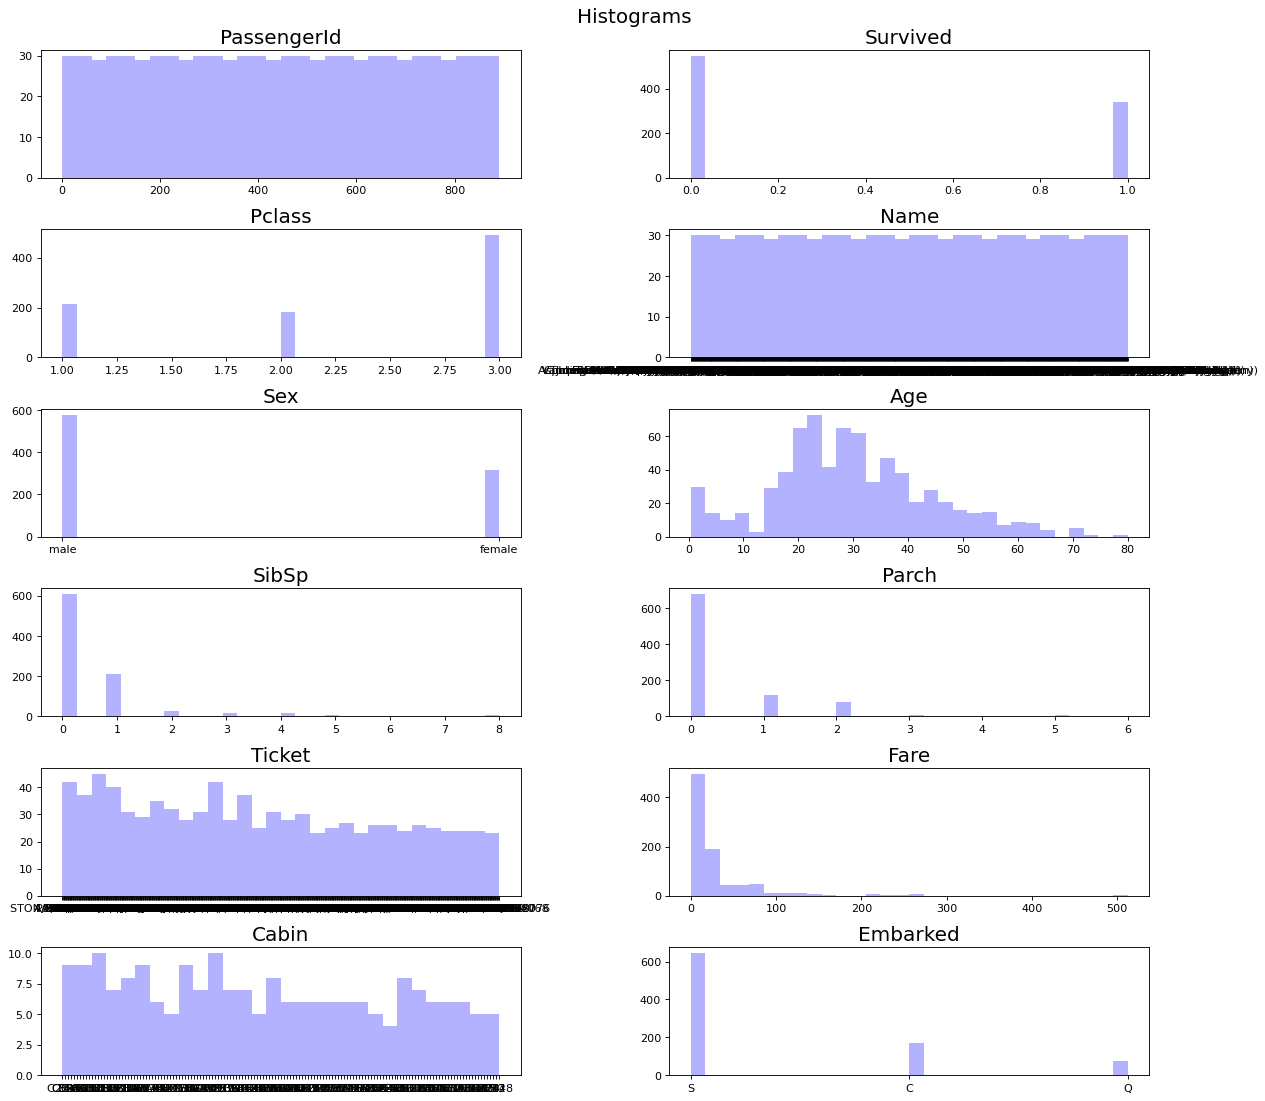

In [8]:
feature = train.columns
p_col = 2
p_row = len(feature.tolist())/p_col
plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle('Histograms', fontsize=18)
plt.subplots_adjust(left = 0.2, wspace=0.2, hspace=0.4)
for i, f in enumerate(feature):
    ax = plt.subplot(p_row, p_col, i+1)
    ax.grid(False)
    train[f].hist(ax = ax,bins = 30, color = 'b',alpha = 0.3)
    ax.set_title(f,color = 'k', fontsize = 18)
    plt.grid(False)
    
plt.tight_layout()  
plt.show()

#### **Fare** - check outliers

In [9]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

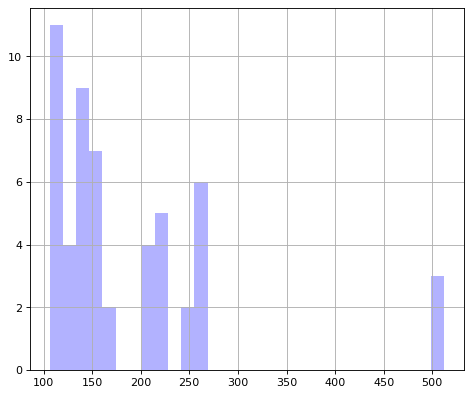

In [10]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
train.Fare[train.Fare > 100].hist(bins = 30, color = 'b',alpha = 0.3)

In [11]:
train.Fare[train.Fare > 300].count() # usunięcie wartości większych niż 300

3

In [12]:
train = train[train.Fare < 300].reset_index(drop = True)
train.shape[0]

888

**Categorical**:
- **Survived** - 0, 1
- **Pclass** - 1, 2, 3
- **Sex** - male, female
- **Embarked** - S, C, Q

**To do:**
1. **Filling the nans**
2. **Text--> Numeric**

**Ad1. Filling the nans**:
- **Age**: mean depending on Pclass
- **Fare**: median
- **Embarked**: the most common
- **Cabin**: selecting a letter and creating a new category fo nans

In [13]:
# AGE
data = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
feature = data.columns

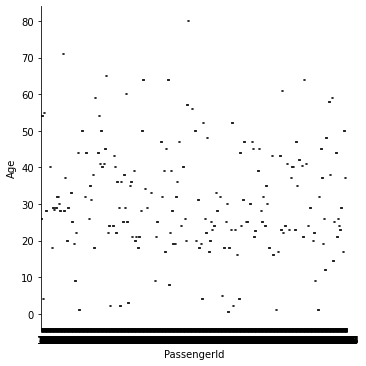

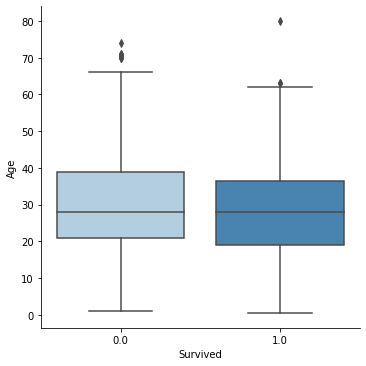

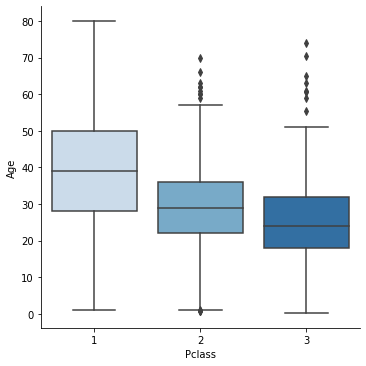

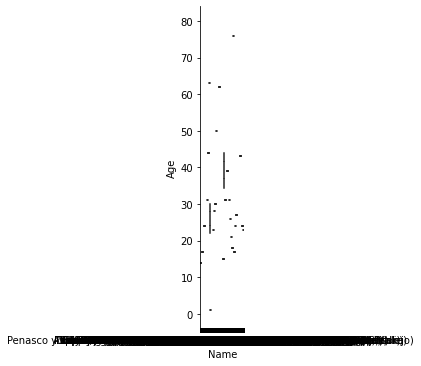

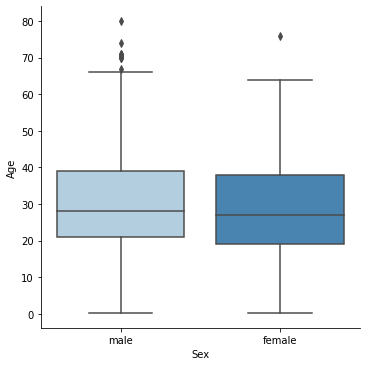

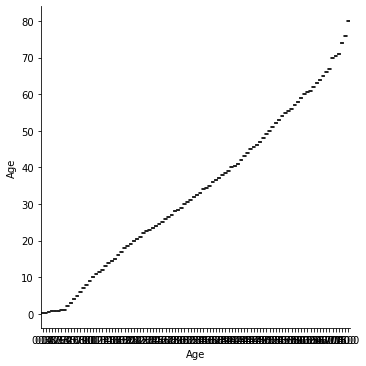

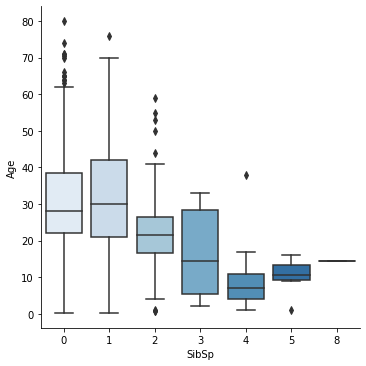

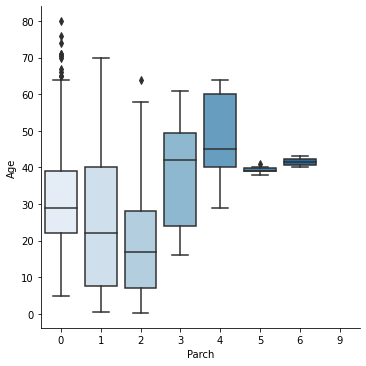

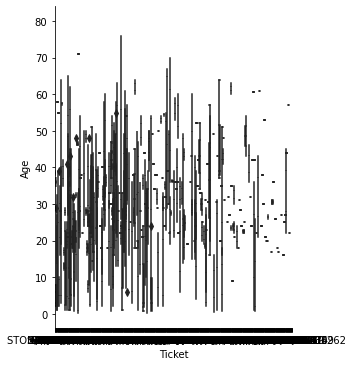

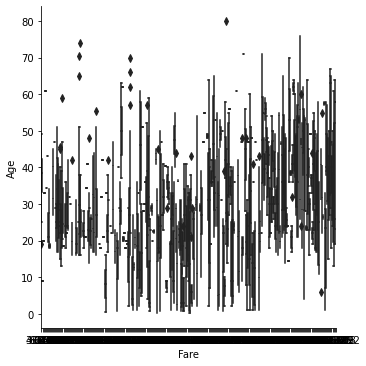

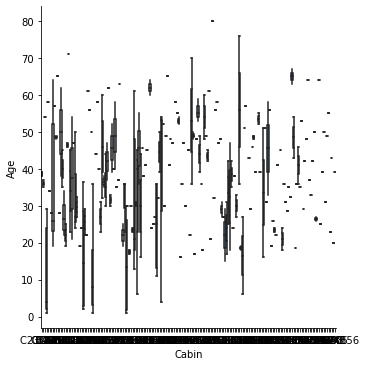

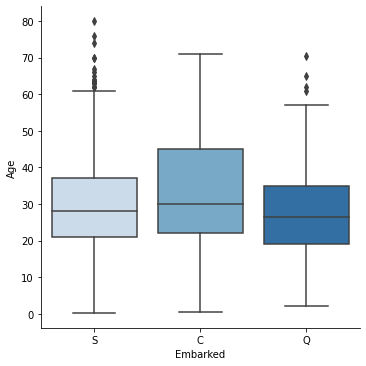

In [14]:
for i, f_i in enumerate(feature):
    sns.factorplot(y = "Age", x = f_i , data = data, kind = "box", palette = "Blues")

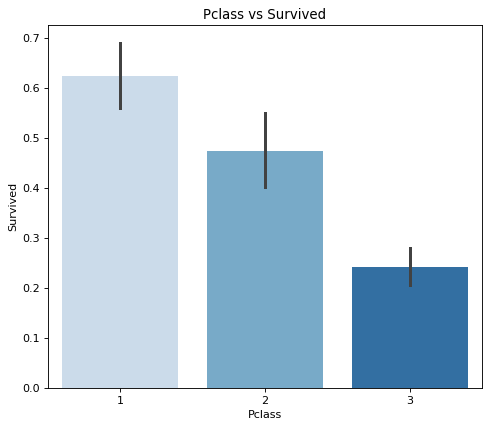

In [15]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Pclass vs Survived')
sns.barplot(train['Pclass'], train['Survived'], palette = "Blues")

In [16]:
print('Mean Pclass == 1: ', data[data.Pclass == 1]['Age'].mean())
print('Mean Pclass == 2: ', data[data.Pclass == 2]['Age'].mean())
print('Mean Pclass == 3: ', data[data.Pclass == 3]['Age'].mean())

Mean Pclass == 1:  39.200782918149464
Mean Pclass == 2:  29.506704980842912
Mean Pclass == 3:  24.81636726546906


In [17]:

age = train[['Pclass', 'Age']].append(test[['Pclass', 'Age']])
age1 = age[age['Pclass'] == 1]['Age']
age2 = age[age['Pclass'] == 2]['Age']
age3 = age[age['Pclass'] == 3]['Age']

data = [train, test]

for d in data:
    ind = d[(d['Pclass'] == 1) & (d['Age'].isnull())].index   
    #age_rand = np.random.randint(age1.mean() - age1.std(), age1.mean() + age1.std(), size = len(ind))
    d['Age'][ind] = age1.mean()
    
    ind = d[(d['Pclass'] == 2) & (d['Age'].isnull())].index    
    #age_rand = np.random.randint(age2.mean() - age2.std(), age2.mean() + age2.std(), size = len(ind))    
    d['Age'][ind] = age2.mean()

    ind = d[(d['Pclass'] == 3) & (d['Age'].isnull())].index    
    #age_rand = np.random.randint(age3.mean() - age3.std(), age3.mean() + age3.std(), size = len(ind))
    d['Age'][ind] = age3.mean()

In [18]:
#FARE
fare = train['Fare'].append(test['Fare'])
data = [train, test]

for d in data:
    ind = d[d['Fare'].isnull()].index
    d['Fare'][ind] = fare.median() 

In [19]:
#EMBARKED
data = [train, test]

for d in data:
    ind = d[d['Embarked'].isnull()].index
    d['Embarked'][ind] = 'S'

In [20]:
# CABIN
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]                   

In [21]:
train.Cabin.unique(), test.Cabin.unique()

(array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [22]:
train.Cabin = train.Cabin.replace(np.nan, 'Z')
test.Cabin = test.Cabin.replace(np.nan, 'Z')

In [23]:
train.Cabin.unique(), test.Cabin.unique()

(array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array(['Z', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [24]:
#checking filling nans
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass  

**Ad2. Text --> Numeric**:
- **Sex**: female/male --> 1/2
- **Name**: seperation [Title]
- <font color='red'>**Ticket**: drop - too many unique values </font>
- **Embarked**: S/C/Q -->  1/2/3

In [25]:
#SEX - female:1, male:2
print(train['Sex'].unique(), test['Sex'].unique())
data = [train, test]
mapping = {"female": 1, "male": 2}

for d in data:
    d['Sex'] = d['Sex'].map(mapping)
    
print(train['Sex'].unique(), test['Sex'].unique())        

['male' 'female'] ['male' 'female']
[2 1] [2 1]


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

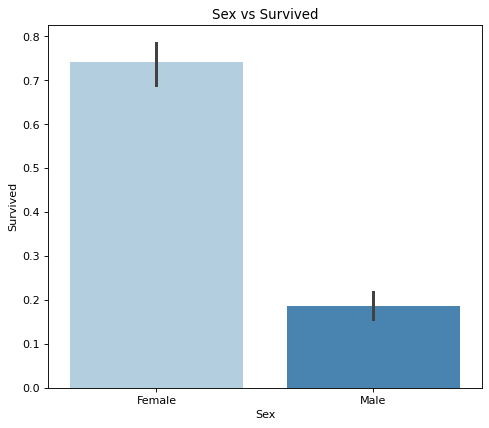

In [26]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Sex vs Survived')
sns.barplot(train['Sex'], train['Survived'], palette = "Blues").set_xticklabels(["Female","Male"])

In [27]:
#NAME
name = train['Name'].append(test['Name'])
name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [28]:
name.str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [29]:
data = [train, test]
for d in data:
    d['Title'] = d['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
pd.crosstab(train['Title'], train['Sex'])

Sex,1,2
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [31]:
# Grouped Title: Rare and add Mlle, Ms to Miss and add Mme to Mrs
data = [train, test]
for d in data:
    d['Title'] = d['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    d['Title'] = d['Title'].replace('Mlle', 'Miss')
    d['Title'] = d['Title'].replace('Ms', 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')

In [32]:
pd.crosstab(train['Title'], train['Sex'])

Sex,1,2
Title,,
Master,0,40
Miss,184,0
Mr,0,515
Mrs,126,0
Rare,3,20


In [33]:
train['Title'].isnull().sum(), test['Title'].isnull().sum()

(0, 0)

In [34]:
print(train['Title'].unique(), test['Title'].unique())
data = [train, test]
mapping = {"Mr": 1, "Mrs": 2, "Miss":3, "Master": 4, "Rare": 5}

for d in data:
    d['Title'] = d['Title'].map(mapping)
    
print(train['Title'].unique(), test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare'] ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
[1 2 3 4 5] [1 2 3 4 5]


[Text(0, 0, 'Mr'),
 Text(1, 0, 'Mrs'),
 Text(2, 0, 'Miss'),
 Text(3, 0, 'Master'),
 Text(4, 0, 'Rare')]

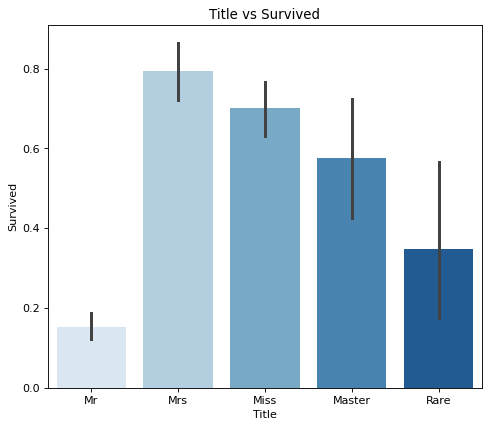

In [35]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Title vs Survived')
sns.barplot(train['Title'], train['Survived'], palette = "Blues").set_xticklabels(["Mr","Mrs","Miss", "Master","Rare"])

In [36]:
train = train.drop(columns = 'Name')
test = test.drop(columns = 'Name')

In [37]:
#TICKET
ticket = train['Ticket'].append(test['Ticket'])
ticket.unique()[:20]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649'], dtype=object)

In [38]:
train = train.drop(columns = 'Ticket')
test = test.drop(columns = 'Ticket')

In [39]:
#EMBARKED
embarked = train['Embarked'].append(test['Embarked'])
embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
print(train['Embarked'].unique(), test['Embarked'].unique())
data = [train, test]
mapping = {"S": 1, "C": 2, "Q": 3}

for d in data:
    d['Embarked'] = d['Embarked'].map(mapping)
    
print(train['Embarked'].unique(), test['Embarked'].unique())

['S' 'C' 'Q'] ['Q' 'S' 'C']
[1 2 3] [3 1 2]


[Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')]

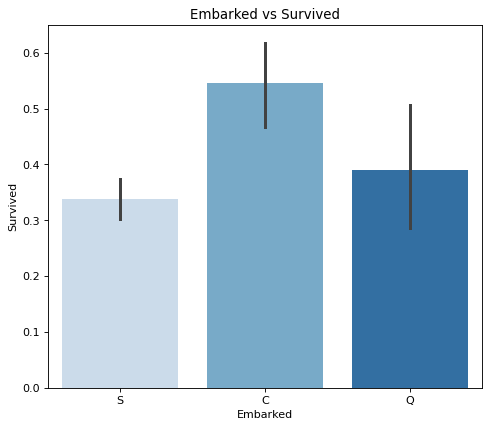

In [41]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Embarked vs Survived')
sns.barplot(train['Embarked'], train['Survived'], palette = "Blues").set_xticklabels(["S","C","Q"])

In [42]:
#CABIN
data = [train, test]
mapping = {"A": 1, "B": 2, "C": 3, "D":4, "E":5, "F":6, "G":7, "T":8, "Z":9}

for d in data:
    d['Cabin'] = d['Cabin'].map(mapping)
    
print(train['Cabin'].unique(), test['Cabin'].unique())

[9 3 5 7 4 1 2 6 8] [9 2 5 1 3 4 6 7]


[Text(0, 0, 'A'),
 Text(1, 0, 'B'),
 Text(2, 0, 'C'),
 Text(3, 0, 'D'),
 Text(4, 0, 'E'),
 Text(5, 0, 'F'),
 Text(6, 0, 'G'),
 Text(7, 0, 'T'),
 Text(8, 0, 'Z')]

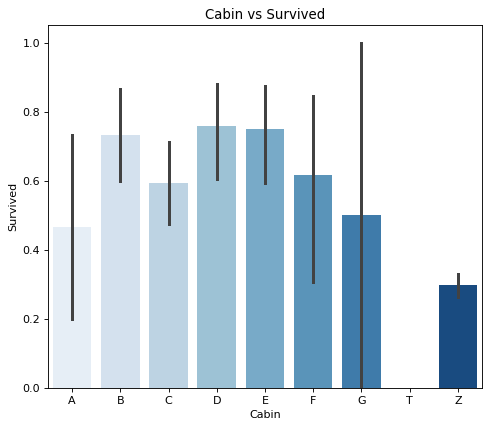

In [43]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Cabin vs Survived')
sns.barplot(train['Cabin'], train['Survived'], palette = "Blues").set_xticklabels(["A","B","C","D","E","F","G","T","Z"])

<font color='red'> Drop **PassegnerId:** too many unique values

In [44]:
train = train.drop(columns = 'PassengerId')

In [45]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    int64  
 8   Embarked     418 non-null    int64  
 9   Title        418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    int64  
 3   Age       888 non-null    float64
 

## Correlations

<AxesSubplot:title={'center':'Correlations'}>

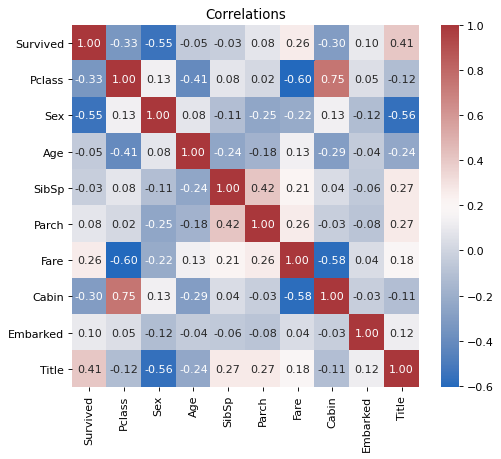

In [46]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Correlations')
sns.heatmap(train.corr(), annot=True, fmt = ".2f", cmap = "vlag")

The worst correleted with **Survived**: **SibSp**, **Parch** i **Age**

The best correleted with **Survived**: **Sex**, **Title** i **Pclass** 

The best correlated with eacg other: 
- **Pclass** with **Cabin**, 
- **Pclass** with **Fare**, 
- **Sex** with **Title**, 
- **SibSp** with **Parch**

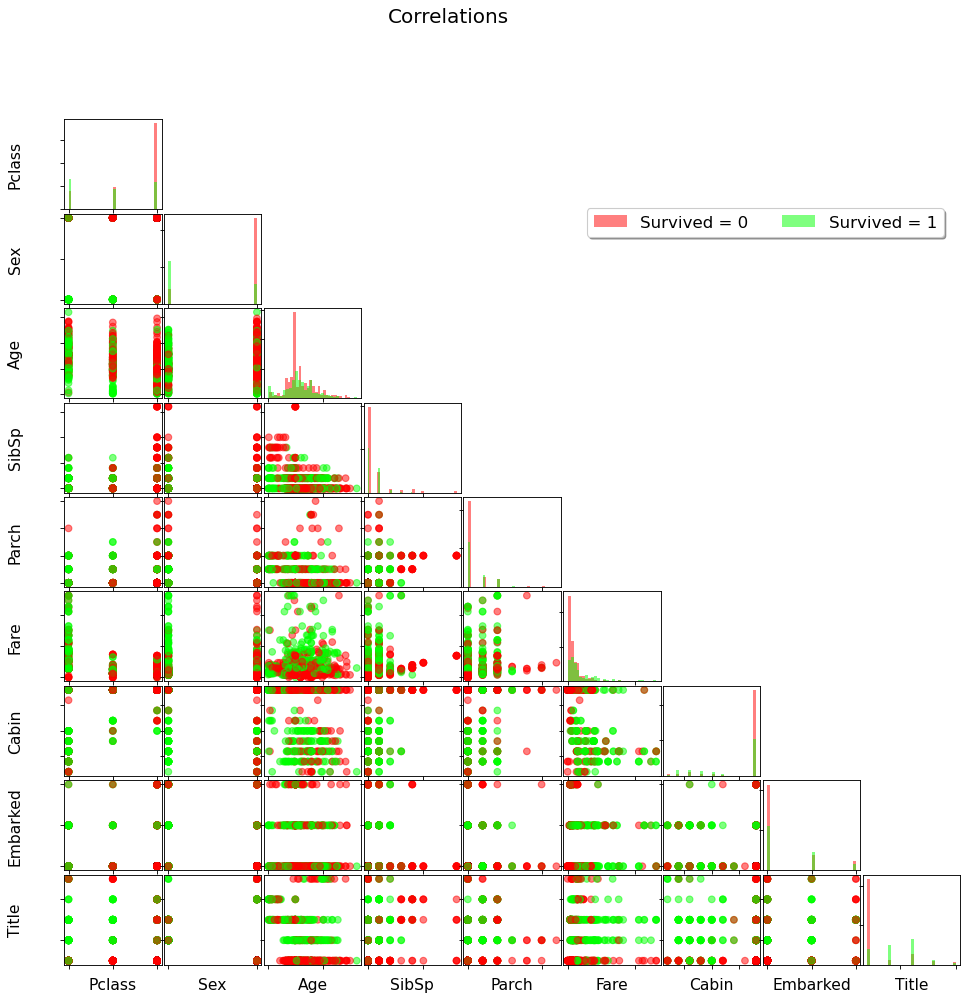

In [47]:
feature = train.columns
survived = train['Survived']
feature = feature[feature != 'Survived']

color_map = {0: (1, 0, 0), 1: (0, 1, 0)} #Survived == 0: zielony i Survived == 1: czerwony
colors = [color_map[y] for y in train.Survived]
labels = ['Survived = 0', 'Survived = 1']

N = len(feature)

plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Correlations", fontsize=18)
plt.subplots_adjust(left = 0.2, wspace=0.025, hspace=0.05)
for i, f_i in enumerate(feature):
    for j, f_j in enumerate(feature):
        
        if i>j:
            ax1 = plt.subplot(N,N,i*N+j+1) 
            plt.scatter(train[f_j],train[f_i],c = colors, alpha=0.5, label = labels)
            plt.axis('on')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])

        elif i == j:
            ax1 = plt.subplot(N,N,i*N+j+1)
            for k in range(2):
                train[f_j][survived == k].hist(ax = ax1, bins = 30, color=color_map[k],alpha = 0.5, label = labels[k])
                plt.axis('on')
                plt.grid(False)
                ax1.set_xticklabels([])
                ax1.set_yticklabels([])
        if j == 0:
            plt.ylabel(f_i,labelpad = 30, fontsize = 14)#, rotation=25)
        if i == N-1: 
            plt.xlabel(f_j,fontsize = 14)#, rotation=25)
            
plt.legend(loc='upper center', bbox_to_anchor=(-1.0, 8.5), fancybox=True, shadow=True, ncol=2, fontsize=15) 
plt.show()

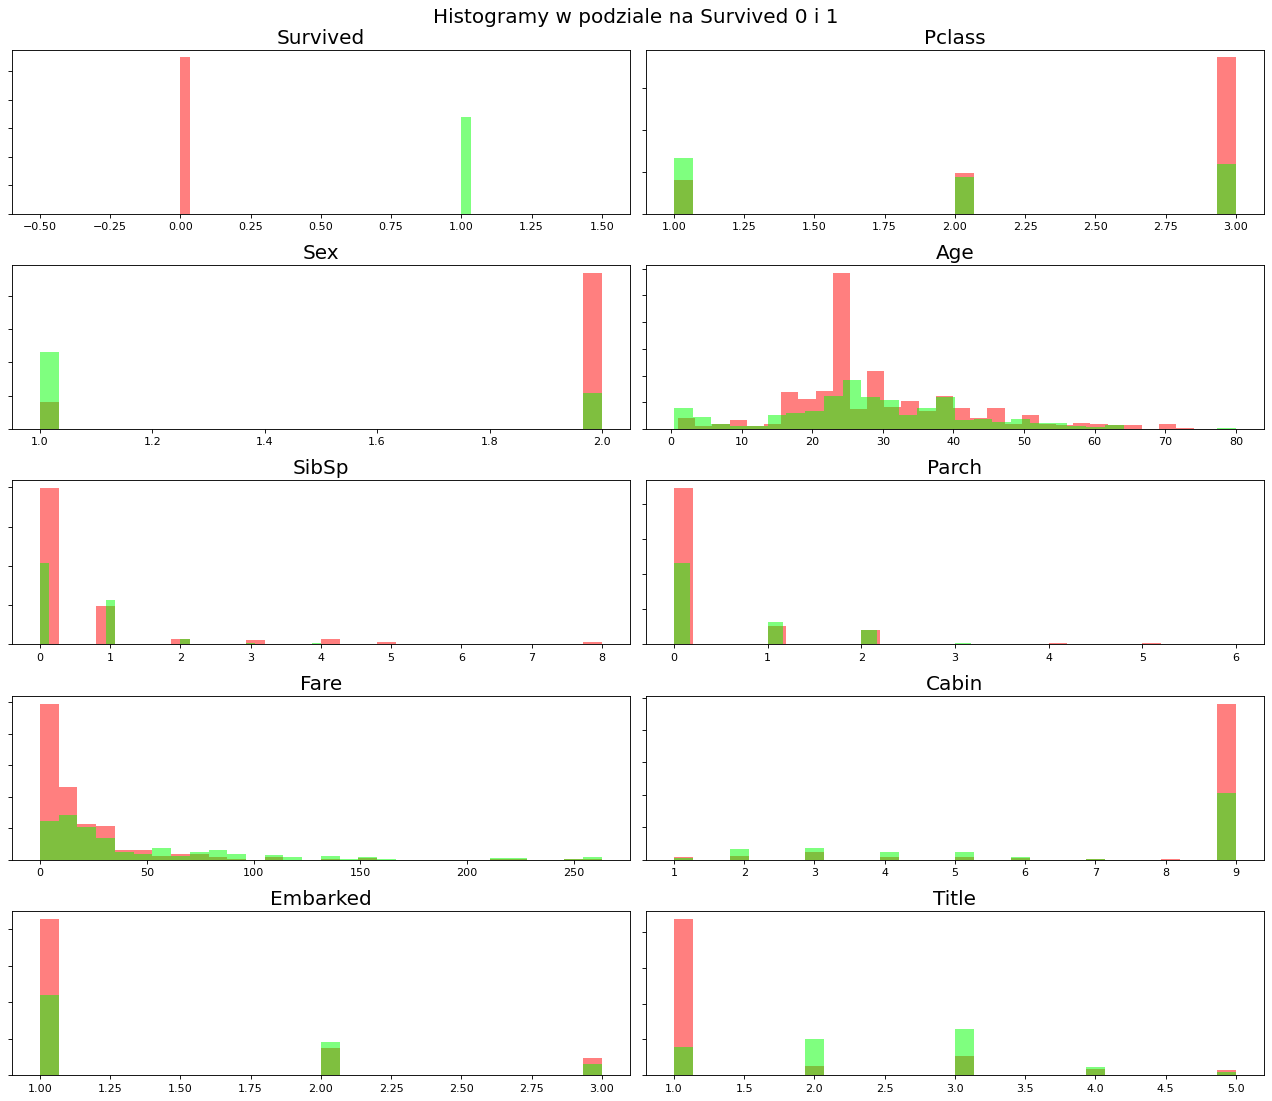

In [48]:
feature = train.columns
survived = train['Survived']
p_col = 2
p_row = round(len(feature.tolist())/p_col + 0.1)

color_map = {0: (1, 0, 0), 1: (0, 1, 0)}
colors = [color_map[y] for y in train.Survived]
labels = ['Survived = 0', 'Survived = 1']

N = len(feature)

plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left = 0.2, wspace=0.2, hspace=0.4)
plt.suptitle("Histogramy w podziale na Survived 0 i 1", fontsize=18)
for i, f_i in enumerate(feature):
    for k in range(2):
        ax1 = plt.subplot(p_row,p_col,i+1)
        train[f_i][survived == k].hist(ax = ax1, bins = 30, color=color_map[k],alpha = 0.5, label = labels[k])
        #plt.axis('on')
        plt.grid(False)
        ax1.set_yticklabels([])
        ax1.set_title(f_i,color = 'k', fontsize = 18)
        
#plt.legend(loc='lower center', bbox_to_anchor=(-1, -1), fancybox=True, shadow=True, ncol=2, fontsize=15)  
plt.tight_layout()  
plt.show()

#### Creation **Family** on the basis of **SibSp** and **Parch**

In [49]:
data = [train, test]
for d in data:
    d['Family'] = d['SibSp'] + d['Parch'] + 1 #without 0

train = train.drop(columns = 'SibSp')
test = test.drop(columns = 'SibSp')

train = train.drop(columns = 'Parch')
test = test.drop(columns = 'Parch')

In [50]:
train['Family'].unique(), test['Family'].unique()

(array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64),
 array([ 1,  2,  3,  5,  4,  6,  8,  7, 11], dtype=int64))

<AxesSubplot:xlabel='Family', ylabel='Survived'>

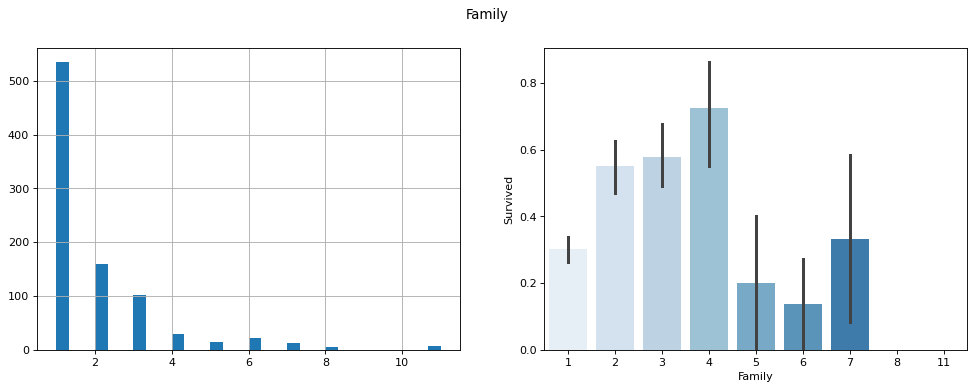

In [51]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Family")
plt.subplot(1,2,1)
train['Family'].hist(bins = 30)
plt.subplot(1,2,2)
sns.barplot(train['Family'], train['Survived'], palette = "Blues")

In [52]:
data = [train, test]
for d in data:    
    d.loc[(d['Family'] > 1) & (d['Family'] <= 4), 'Family'] = 2 #small family
    d.loc[(d['Family'] > 4), 'Family'] = 3 #big family

<AxesSubplot:xlabel='Family', ylabel='Survived'>

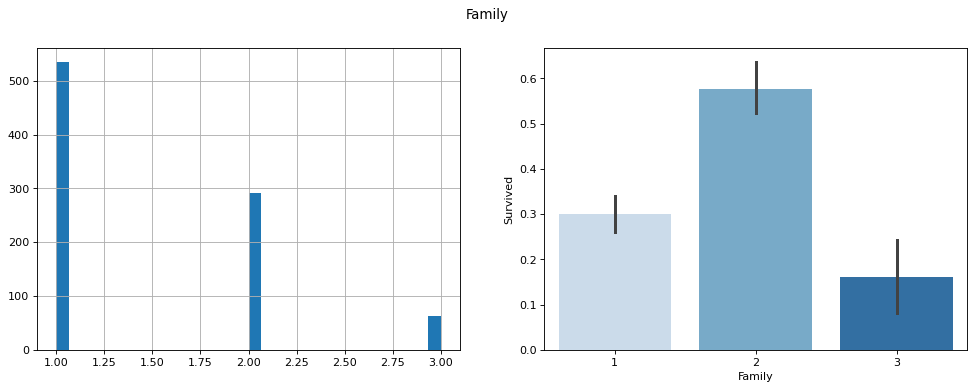

In [53]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Family")
plt.subplot(1,2,1)
train['Family'].hist(bins = 30)
plt.subplot(1,2,2)
sns.barplot(train['Family'], train['Survived'], palette = "Blues")

#### **Decission Tree - before categorizing continuous variables**

In [54]:
cut = 0.01 

In [55]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()
kol = X_train.columns

#standarization
X_train = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_train).transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_test).transform(X_test), columns = X_test.columns)

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 8) (888,) (418, 8)
Accuracy 0.99
Accuracy cross: 0.78 (+/- 0.02)


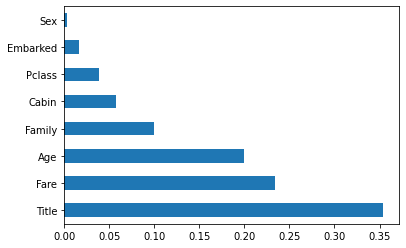

In [56]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [57]:
feat = pd.DataFrame(feat_importances).reset_index()
feat_del = feat[feat[0] < cut]
del_f = feat_del['index'].tolist()
del_f

['Sex']

In [58]:
if len(del_f) > 0:
    X_train = X_train.drop(columns = del_f)
    X_test = X_test.drop(columns = del_f)
    kol = X_train.columns

    print(X_train.shape, Y_train.shape, X_test.shape)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

    scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
    print("Accuracy:", acc_dtree)
    print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 7) (888,) (418, 7)
Accuracy: 0.99
Accuracy cross: 0.79 (+/- 0.03)


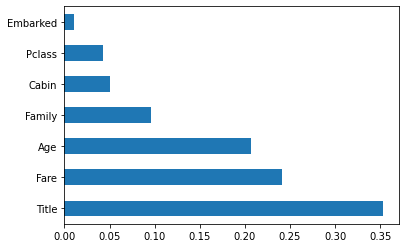

In [59]:
if len(del_f) > 0:
    feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
    feat_importances.nlargest(100).plot(kind='barh')
    plt.show()

In [60]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred}).sort_values(by = 'PassengerId').reset_index(drop = True)
output.to_csv('my_submission.csv', index=False)

In [61]:
#drawing tree
feature = kol
export_graphviz(decision_tree, out_file = str(path + '/results/tree.dot'), feature_names = feature,
               class_names = ['0', '1'], rounded = True, filled = True)

(graph,) = pydot.graph_from_dot_file(path + '/results/tree.dot')
graph.write_png(path + '/results/tree.png')

## Converting continuous variables to categorical

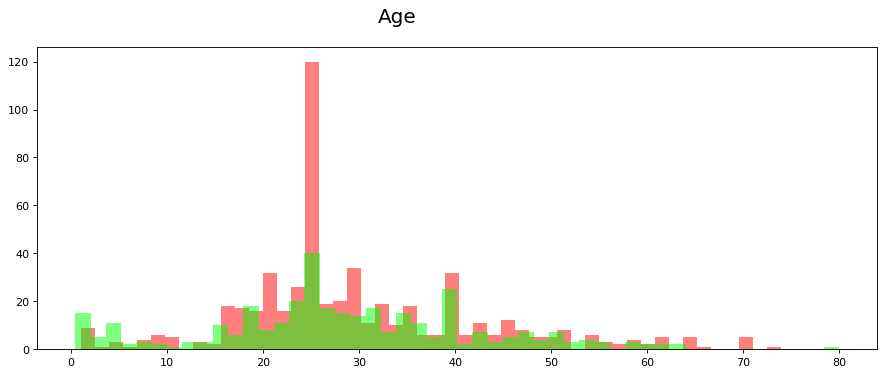

In [62]:
# AGE 

survived = train['Survived']
color_map = {0: (1, 0, 0), 1: (0, 1, 0)} #Survived == 0: zielony i Survived == 1: czerwony
colors = [color_map[y] for y in train.Survived]

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Age", fontsize=18)
plt.subplots_adjust(left = 0.2, wspace=0.025, hspace=0.05)

for k in range(2):
    train['Age'][survived == k].hist(bins = 50, color=color_map[k],alpha = 0.5)
    plt.axis('on')
    plt.grid(False)

In [63]:
data = [train, test]
for d in data:    
    d.loc[d['Age'] <= 5, 'Age'] = 1
    d.loc[(d['Age'] > 5) & (d['Age'] <= 18), 'Age'] = 2
    d.loc[(d['Age'] > 18) & (d['Age'] <= 32), 'Age'] = 3
    d.loc[(d['Age'] > 32) & (d['Age'] <= 48), 'Age'] = 4
    d.loc[(d['Age'] > 48) & (d['Age'] <= 64), 'Age'] = 5
    d.loc[(d['Age'] > 64), 'Age'] = 6

<AxesSubplot:xlabel='Age', ylabel='Survived'>

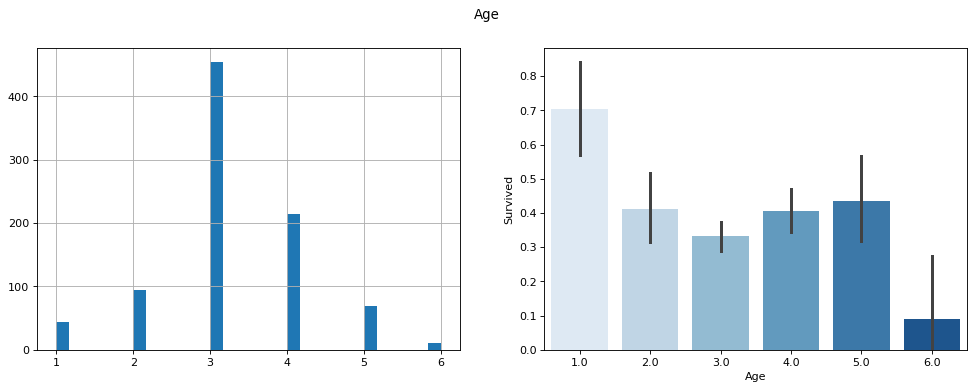

In [64]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Age")
plt.subplot(1,2,1)
train['Age'].hist(bins = 30)
plt.subplot(1,2,2)
sns.barplot(train['Age'], train['Survived'], palette = "Blues")

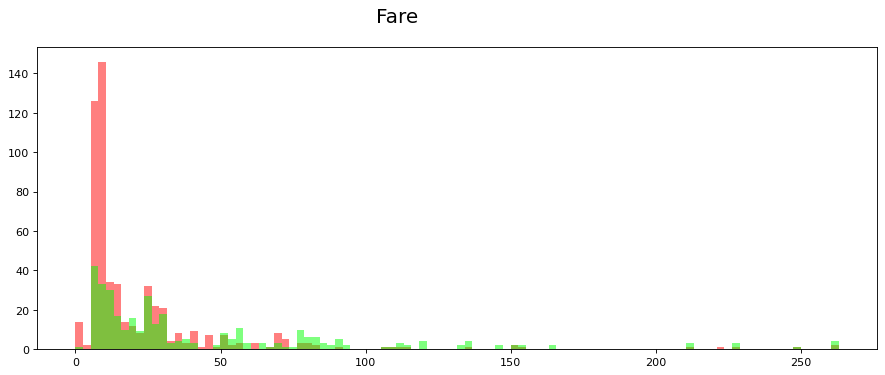

In [65]:
#FARE

survived = train['Survived']
color_map = {0: (1, 0, 0), 1: (0, 1, 0)} #Survived == 0: zielony i Survived == 1: czerwony
colors = [color_map[y] for y in train.Survived]

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Fare", fontsize=18)
plt.subplots_adjust(left = 0.2, wspace=0.025, hspace=0.05)

for k in range(2):
    train['Fare'][survived == k].hist(bins = 100, color=color_map[k],alpha = 0.5)
    plt.axis('on')
    plt.grid(False)
    #plt.xlim([0, 50 ])
    #plt.ylim([0, 50])

In [66]:
data = [train, test]
for d in data:    
    d.loc[d['Fare'] <= 5, 'Fare'] = 1
    d.loc[(d['Fare'] > 5) & (d['Fare'] <= 12), 'Fare'] = 2
    d.loc[(d['Fare'] > 12) & (d['Fare'] <= 30), 'Fare'] = 3
    d.loc[(d['Fare'] > 30) & (d['Fare'] <= 100), 'Fare'] = 4
    d.loc[(d['Fare'] > 100), 'Fare'] = 5

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

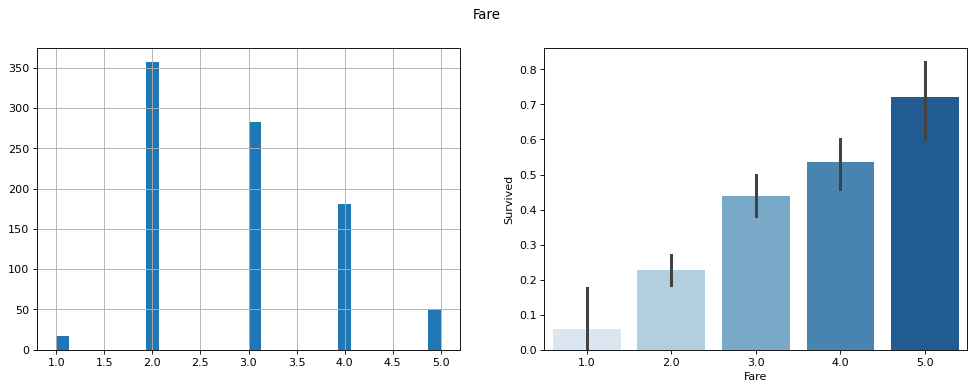

In [67]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle("Fare")
plt.subplot(1,2,1)
train['Fare'].hist(bins = 30)
plt.subplot(1,2,2)
sns.barplot(train['Fare'], train['Survived'], palette = "Blues")

<AxesSubplot:title={'center':'Correlations 2'}>

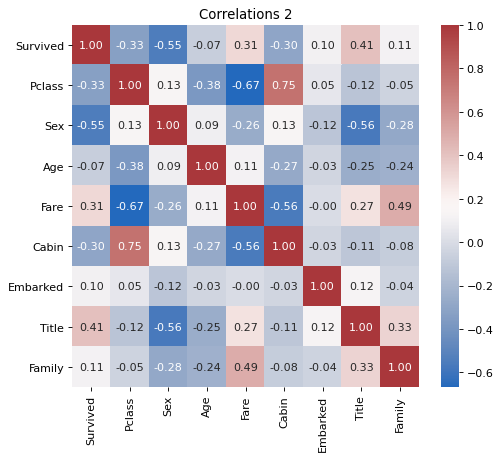

In [68]:
plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Correlations 2')
sns.heatmap(train.corr(), annot=True, fmt = ".2f", cmap = "vlag")

#### **Decission Tree - after converting continuous variables to categorical**

In [69]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()
kol = X_train.columns

X_train = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_train).transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_test).transform(X_test), columns = X_test.columns)

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 8) (888,) (418, 8)
Accuracy: 0.9
Accuracy cross: 0.81 (+/- 0.04)


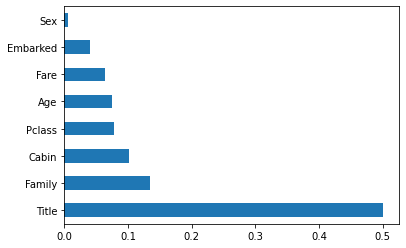

In [70]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [71]:
feat = pd.DataFrame(feat_importances).reset_index()
feat_del = feat[feat[0] < cut]
del_f = feat_del['index'].tolist()
del_f

['Sex']

In [72]:
X_train = X_train.drop(columns = del_f)
X_test = X_test.drop(columns = del_f)
kol = X_train.columns

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 7) (888,) (418, 7)
Accuracy: 0.9
Accuracy cross: 0.81 (+/- 0.03)


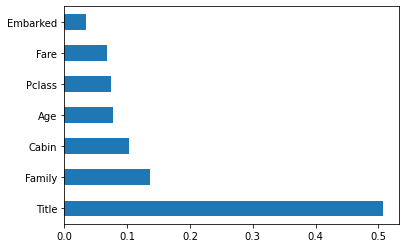

In [73]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [74]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred}).sort_values(by = 'PassengerId').reset_index(drop = True)
output.to_csv('my_submission2.csv', index=False)

## Additional variables - a combination of all features

In [75]:
train2 = train.copy()
test2 = test.copy()
feature = train2.columns
feature = feature[feature != 'Survived']

for i, f_i in enumerate(feature):
    for j, f_j in enumerate(feature): 
        if f_i != f_j:
            if not f_j + '_' + f_i in train2:
            
                train2[f_i + '_' + f_j] = train2[f_i]*train2[f_j]
                test2[f_i + '_' + f_j] = test2[f_i]*test2[f_j]
            
    train2 = train2.drop(columns = f_i)
    test2 = test2.drop(columns = f_i)

In [76]:
train2.columns

Index(['Survived', 'Pclass_Sex', 'Pclass_Age', 'Pclass_Fare', 'Pclass_Cabin',
       'Pclass_Embarked', 'Pclass_Title', 'Pclass_Family', 'Sex_Age',
       'Sex_Fare', 'Sex_Cabin', 'Sex_Embarked', 'Sex_Title', 'Sex_Family',
       'Age_Fare', 'Age_Cabin', 'Age_Embarked', 'Age_Title', 'Age_Family',
       'Fare_Cabin', 'Fare_Embarked', 'Fare_Title', 'Fare_Family',
       'Cabin_Embarked', 'Cabin_Title', 'Cabin_Family', 'Embarked_Title',
       'Embarked_Family', 'Title_Family'],
      dtype='object')

#### **Decission Tree - with additional variables**

In [77]:
X_train = train2.drop("Survived", axis=1)
Y_train = train2["Survived"]
X_test = test2.drop("PassengerId", axis=1).copy()
kol = X_train.columns

X_train = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_train).transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_test).transform(X_test), columns = X_test.columns)

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 28) (888,) (418, 28)
Accuracy: 0.9
Accuracy cross: 0.82 (+/- 0.03)


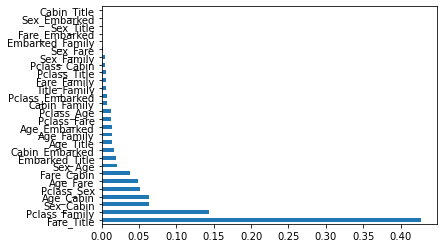

In [78]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [79]:
feat = pd.DataFrame(feat_importances).reset_index()
feat_del = feat[feat[0] < cut]
del_f = feat_del['index'].tolist()
del_f

['Pclass_Cabin',
 'Pclass_Embarked',
 'Pclass_Title',
 'Sex_Fare',
 'Sex_Embarked',
 'Sex_Title',
 'Sex_Family',
 'Fare_Embarked',
 'Fare_Family',
 'Cabin_Title',
 'Cabin_Family',
 'Embarked_Family',
 'Title_Family']

In [80]:
X_train = X_train.drop(columns = del_f)
X_test = X_test.drop(columns = del_f)
kol = X_train.columns

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 15) (888,) (418, 15)
Accuracy: 0.9
Accuracy cross: 0.82 (+/- 0.03)


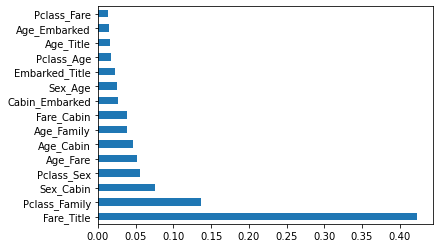

In [81]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [82]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred}).sort_values(by = 'PassengerId').reset_index(drop = True)
output.to_csv('my_submission3.csv', index=False)

## Each unique variable value as a new feature

In [83]:
## AD TOP3 additional features
data = [train, test]
for d in data:
    d['Pclass_Family'] = d['Pclass'] * d['Family'] 
    d['Fare_Title'] = d['Fare'] * d['Title']   
    d['Sex_Cabin'] = d['Cabin'] * d['Sex']

In [84]:
data = train.append(test)

feature = data.columns
feature = feature[feature != 'Survived']
feature = feature[feature != 'PassengerId']

zer = np.zeros(train.shape[0])
zer2 = np.zeros(test.shape[0])

for i, f_i in enumerate(feature):
    un = data[f_i].unique().tolist()
    for j, f_j in enumerate(un):       
        train[f_i + '_' + str(f_j)] = zer
        ind = train[train[f_i] == f_j].index
        train[f_i + '_' + str(f_j)][ind] = 1
        
        test[f_i + '_' + str(f_j)] = zer2
        ind = test[test[f_i] == f_j].index
        test[f_i + '_' + str(f_j)][ind] = 1
    train = train.drop(columns = f_i)
    test = test.drop(columns = f_i)

In [85]:
train.shape[0], test.shape[0]

(888, 418)

#### **Decision Tree - each unique variable value as a new feature**

In [86]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()
kol = X_train.columns

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 69) (888,) (418, 69)
Accuracy: 0.9
Accuracy cross: 0.81 (+/- 0.02)


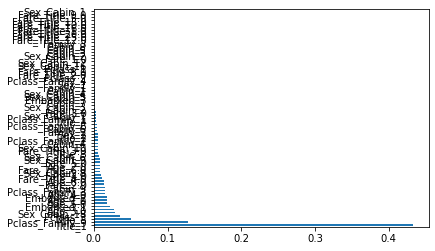

In [87]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [88]:
feat = pd.DataFrame(feat_importances).reset_index()
feat_del = feat[feat[0] < cut]
del_f = feat_del['index'].tolist()
del_f

['Pclass_1',
 'Pclass_2',
 'Sex_2',
 'Sex_1',
 'Age_2.0',
 'Fare_4.0',
 'Fare_3.0',
 'Fare_5.0',
 'Fare_1.0',
 'Cabin_3',
 'Cabin_5',
 'Cabin_7',
 'Cabin_4',
 'Cabin_1',
 'Cabin_2',
 'Cabin_6',
 'Cabin_8',
 'Embarked_3',
 'Title_2',
 'Title_3',
 'Title_4',
 'Family_2',
 'Family_1',
 'Family_3',
 'Pclass_Family_6',
 'Pclass_Family_2',
 'Pclass_Family_1',
 'Pclass_Family_4',
 'Fare_Title_2.0',
 'Fare_Title_8.0',
 'Fare_Title_6.0',
 'Fare_Title_12.0',
 'Fare_Title_9.0',
 'Fare_Title_3.0',
 'Fare_Title_5.0',
 'Fare_Title_15.0',
 'Fare_Title_10.0',
 'Fare_Title_16.0',
 'Fare_Title_1.0',
 'Fare_Title_20.0',
 'Fare_Title_25.0',
 'Sex_Cabin_3',
 'Sex_Cabin_9',
 'Sex_Cabin_10',
 'Sex_Cabin_7',
 'Sex_Cabin_8',
 'Sex_Cabin_2',
 'Sex_Cabin_6',
 'Sex_Cabin_4',
 'Sex_Cabin_12',
 'Sex_Cabin_5',
 'Sex_Cabin_16',
 'Sex_Cabin_1']

In [89]:
X_train = X_train.drop(columns = del_f)
X_test = X_test.drop(columns = del_f)
kol = X_train.columns

print(X_train.shape, Y_train.shape, X_test.shape)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(888, 16) (888,) (418, 16)
Accuracy: 0.87
Accuracy cross: 0.82 (+/- 0.03)


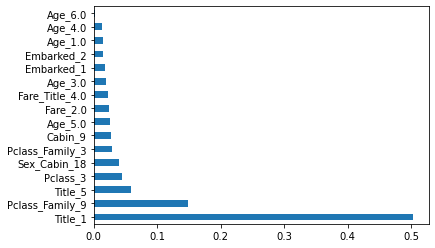

In [90]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=kol)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [91]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred}).sort_values(by = 'PassengerId').reset_index(drop = True)
output.to_csv('my_submission4.csv', index=False)

In [92]:
#Drawing tree
feature = kol
export_graphviz(decision_tree, out_file = str(path + '/results/tree4.dot'), feature_names = feature,
               class_names = ['0', '1'], rounded = True, filled = True)

(graph,) = pydot.graph_from_dot_file(path + '/results/tree4.dot')
graph.write_png(path + '/results/tree4.png')

### Finding the best tree parameters

In [93]:
best_tree = pd.DataFrame(columns = ['depth', 'criterion', 'splitter', 'score', 'std'])
r = 0
for i in np.arange(1, 11, 1):
    for j in ['gini', 'entropy']:
        for k in ['best', 'random']:
            X_train = train.drop(["Survived"], axis=1)
            X_train = X_train.drop(columns = del_f)
            Y_train = train["Survived"]
            X_test = test.drop(["PassengerId"], axis=1).copy()
            X_test = X_test.drop(columns = del_f)
            kol = X_train.columns

            X_train = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_train).transform(X_train), columns = X_train.columns)
            X_test = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit(X_test).transform(X_test), columns = X_test.columns)

            decision_tree = DecisionTreeClassifier(max_depth = i, criterion = j, splitter = k)
            decision_tree.fit(X_train, Y_train)
            Y_pred = decision_tree.predict(X_test)
            scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
            best_tree.loc[r] = [i, j, k, scores.mean(), scores.std()]
            r = r + 1

In [94]:
best_tree.sort_values(by = 'score', ascending = False).head()

,depth,criterion,splitter,score,std
15,4,entropy,random,0.833340,0.015731
14,4,entropy,best,0.833340,0.015731
13,4,gini,random,0.833340,0.015731
12,4,gini,best,0.833340,0.015731
18,5,entropy,best,0.832235,0.016980


In [95]:
decision_tree = DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train), 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
print("Accuracy:", acc_dtree)
print("Accuracy cross: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.83
Accuracy cross: 0.83 (+/- 0.02)


In [96]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred}).sort_values(by = 'PassengerId').reset_index(drop = True)
output.to_csv('my_submission5.csv', index=False)